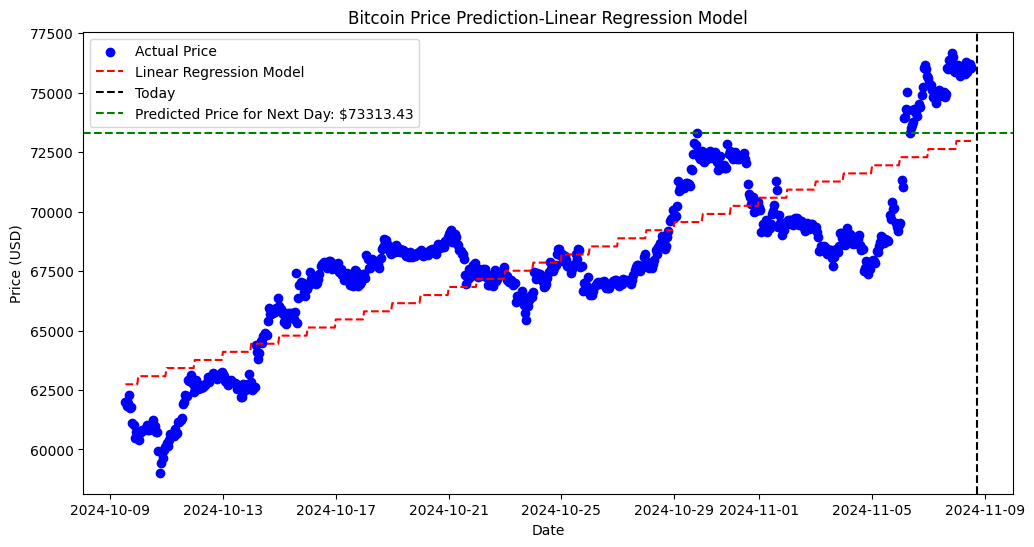

In [1]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = 'CG-71WZpBDHuh3BQ8jHLKakxhRP'
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

headers = {
    'Content-Type': 'application/json',
    'X-CoinGecko-API-Key': API_KEY
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    X = df['timestamp'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['price'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict price for the next day
    next_day_timestamp = datetime.now().toordinal() + 1
    next_day_price = model.predict([[next_day_timestamp]])[0]

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.scatter(df['timestamp'], df['price'], color='blue', label='Actual Price')
    plt.plot(df['timestamp'], model.predict(X), color='red', linestyle='--', label='Linear Regression Model')
    plt.axvline(x=datetime.now(), color='k', linestyle='--', label='Today')
    if datetime.now() in df['timestamp'].values:
        today_price = df[df['timestamp'] == datetime.now()]['price'].values[0]
        plt.axhline(y=today_price, color='m', linestyle='--', label=f"Today's Price: ${today_price}")
    plt.axhline(y=next_day_price, color='g', linestyle='--', label='Predicted Price for Next Day: $' + str(round(next_day_price, 2)))
    plt.title('Bitcoin Price Prediction-Linear Regression Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
else:
    print("Failed to retrieve data from the API.")


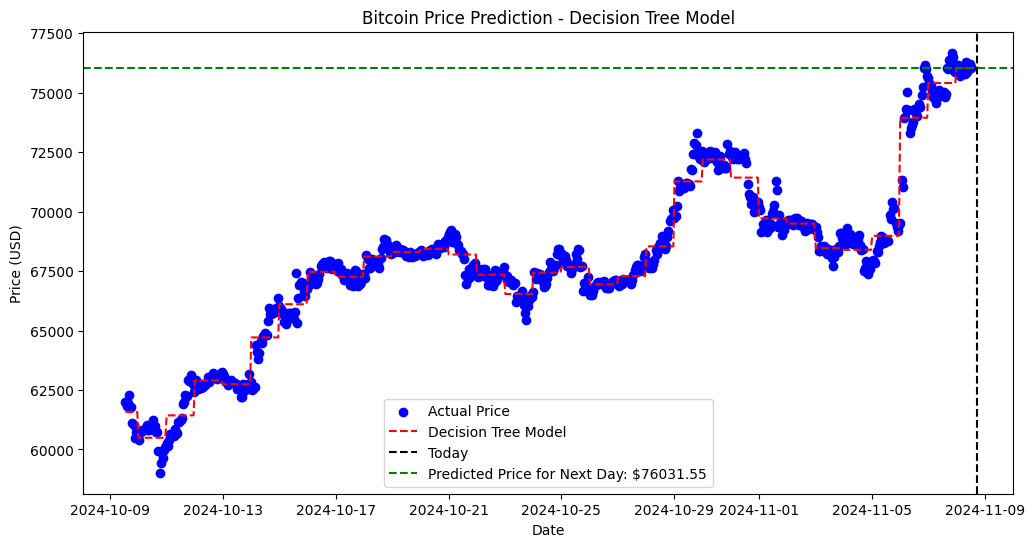

Predicted Bitcoin Price for Next Day: $76031.55


In [2]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = 'CG-71WZpBDHuh3BQ8jHLKakxhRP'
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

headers = {
    'Content-Type': 'application/json',
    'X-CoinGecko-API-Key': API_KEY
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    X = df['timestamp'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['price'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Decision Tree Regression model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Predict price for the next day
    next_day_timestamp = datetime.now().toordinal() + 1
    next_day_price = model.predict([[next_day_timestamp]])[0]

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.scatter(df['timestamp'], df['price'], color='blue', label='Actual Price')
    plt.plot(df['timestamp'], model.predict(X), color='red', linestyle='--', label='Decision Tree Model')
    plt.axvline(x=datetime.now(), color='k', linestyle='--', label='Today')
    if datetime.now() in df['timestamp'].values:
        today_price = df[df['timestamp'] == datetime.now()]['price'].values[0]
        plt.axhline(y=today_price, color='m', linestyle='--', label=f"Today's Price: ${today_price}")
    plt.axhline(y=next_day_price, color='g', linestyle='--', label='Predicted Price for Next Day: $' + str(round(next_day_price, 2)))
    plt.title('Bitcoin Price Prediction - Decision Tree Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Print today's and next day's prices
    print(f"Predicted Bitcoin Price for Next Day: ${round(next_day_price, 2)}")
else:
    print("Failed to retrieve data from the API.")


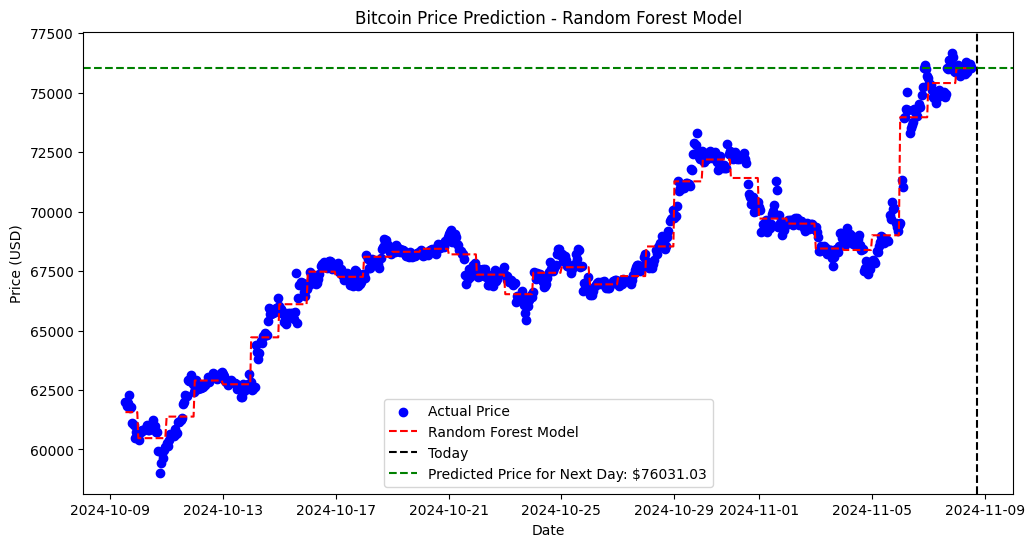

Predicted Bitcoin Price for Next Day: $76031.03


In [3]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = 'CG-71WZpBDHuh3BQ8jHLKakxhRP'
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

headers = {
    'Content-Type': 'application/json',
    'X-CoinGecko-API-Key': API_KEY
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    X = df['timestamp'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['price'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Random Forest Regression model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Predict price for the next day
    next_day_timestamp = datetime.now().toordinal() + 1
    next_day_price = model.predict([[next_day_timestamp]])[0]

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.scatter(df['timestamp'], df['price'], color='blue', label='Actual Price')
    plt.plot(df['timestamp'], model.predict(X), color='red', linestyle='--', label='Random Forest Model')
    plt.axvline(x=datetime.now(), color='k', linestyle='--', label='Today')
    if datetime.now() in df['timestamp'].values:
        today_price = df[df['timestamp'] == datetime.now()]['price'].values[0]
        plt.axhline(y=today_price, color='m', linestyle='--', label=f"Today's Price: ${today_price}")
    plt.axhline(y=next_day_price, color='g', linestyle='--', label='Predicted Price for Next Day: $' + str(round(next_day_price, 2)))
    plt.title('Bitcoin Price Prediction - Random Forest Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Print today's and next day's prices
    print(f"Predicted Bitcoin Price for Next Day: ${round(next_day_price, 2)}")
else:
    print("Failed to retrieve data from the API.")


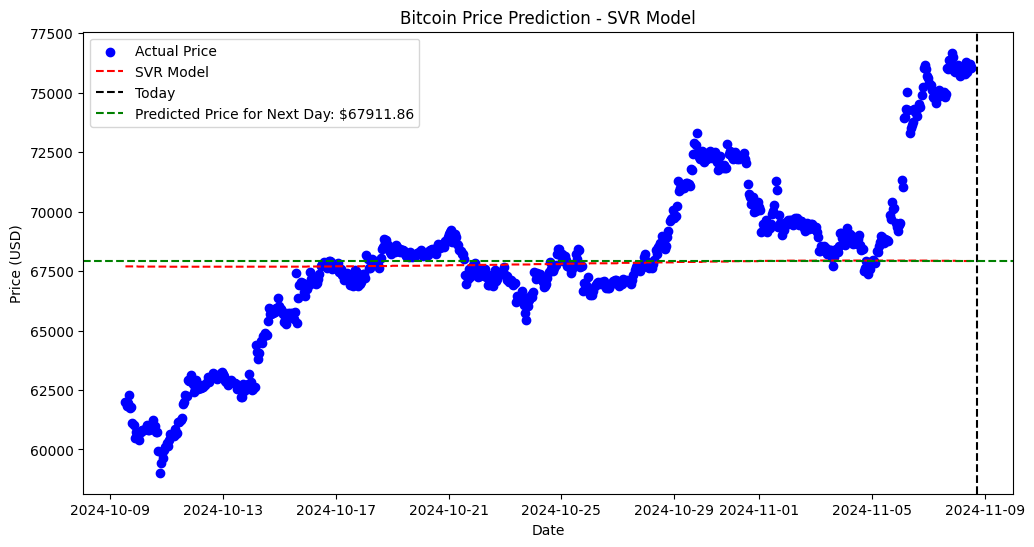

Predicted Bitcoin Price for Next Day: $67911.86


In [4]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = 'CG-71WZpBDHuh3BQ8jHLKakxhRP'
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

headers = {
    'Content-Type': 'application/json',
    'X-CoinGecko-API-Key': API_KEY
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    X = df['timestamp'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['price'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Support Vector Regressor (SVR) model
    model = SVR()
    model.fit(X_train, y_train)

    # Predict price for the next day
    next_day_timestamp = datetime.now().toordinal() + 1
    next_day_price = model.predict([[next_day_timestamp]])[0]

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.scatter(df['timestamp'], df['price'], color='blue', label='Actual Price')
    plt.plot(df['timestamp'], model.predict(X), color='red', linestyle='--', label='SVR Model')
    plt.axvline(x=datetime.now(), color='k', linestyle='--', label='Today')
    if datetime.now() in df['timestamp'].values:
        today_price = df[df['timestamp'] == datetime.now()]['price'].values[0]
        plt.axhline(y=today_price, color='m', linestyle='--', label=f"Today's Price: ${today_price}")
    plt.axhline(y=next_day_price, color='g', linestyle='--', label='Predicted Price for Next Day: $' + str(round(next_day_price, 2)))
    plt.title('Bitcoin Price Prediction - SVR Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Print today's and next day's prices
    print(f"Predicted Bitcoin Price for Next Day: ${round(next_day_price, 2)}")
else:
    print("Failed to retrieve data from the API.")


In [12]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = 'CG-71WZpBDHuh3BQ8jHLKakxhRP'
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

headers = {
    'Content-Type': 'application/json',
    'X-CoinGecko-API-Key': API_KEY
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    X = df['timestamp'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['price'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Gradient Boosting Regressor model
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predict price for the next day
    next_day_timestamp = datetime.now().toordinal() + 1
    next_day_price = model.predict([[next_day_timestamp]])[0]

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.scatter(df['timestamp'], df['price'], color='blue', label='Actual Price')
    plt.plot(df['timestamp'], model.predict(X), color='red', linestyle='--', label='Gradient Boosting Model')
    plt.axvline(x=datetime.now(), color='k', linestyle='--', label='Today')
    if datetime.now() in df['timestamp'].values:
        today_price = df[df['timestamp'] == datetime.now()]['price'].values[0]
        plt.axhline(y=today_price, color='m', linestyle='--', label=f"Today's Price: ${today_price}")
    plt.axhline(y=next_day_price, color='g', linestyle='--', label='Predicted Price for Next Day: $' + str(round(next_day_price, 2)))
    plt.title('Bitcoin Price Prediction - Gradient Boosting Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Print today's and next day's prices
    print(f"Predicted Bitcoin Price for Next Day: ${round(next_day_price, 2)}")
else:
    print("Failed to retrieve data from the API.")


Failed to retrieve data from the API.


In [11]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = 'CG-71WZpBDHuh3BQ8jHLKakxhRP'
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

headers = {
    'Content-Type': 'application/json',
    'X-CoinGecko-API-Key': API_KEY
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    X = df['timestamp'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['price'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Support Vector Machine': SVR()
    }

    plt.figure(figsize=(12, 6))
    plt.scatter(df['timestamp'], df['price'], color='blue', label='Actual Price')

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X)
        plt.plot(df['timestamp'], predictions, label=f'{model_name} Model')

    plt.axvline(x=datetime.now(), color='k', linestyle='--', label='Today')
    if datetime.now() in df['timestamp'].values:
        today_price = df[df['timestamp'] == datetime.now()]['price'].values[0]
        plt.axhline(y=today_price, color='m', linestyle='--', label=f"Today's Price: ${today_price}")

    # Predict price for the next day using the last model in the loop
    next_day_timestamp = datetime.now().toordinal() + 1
    next_day_price = model.predict([[next_day_timestamp]])[0]

    plt.axhline(y=next_day_price, color='g', linestyle='--', label='Predicted Price for Next Day: $' + str(round(next_day_price, 2)))
    plt.title('Bitcoin Price Prediction using Various Models')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
else:
    print("Failed to retrieve data from the API.")


Failed to retrieve data from the API.
